In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)  # If False then gives probability values b/w 0 to 1
                                                                  # else gives 0 or 1, when True

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
# 28x28 images are flattened and stored as an array of 784 pixel values

mnist.train.images.shape

(55000, 784)

In [4]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
mnist.train.num_examples

55000

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.validation.images.shape

(5000, 784)

In [12]:
mnist.train.images[100].shape   # 100 is a position or the image number

(784,)

In [15]:
mnist.train.images[200].min()   # 100 is a position or the image number

0.0

In [16]:
mnist.train.images[200].max()   # 100 is a position or the image number

1.0

## Visualizing the data

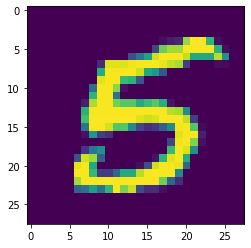

In [17]:
plt.imshow(mnist.train.images[15000].reshape(28,28))

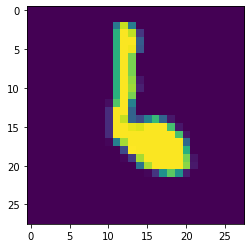

In [18]:
plt.imshow(mnist.train.images[600].reshape(28,28))

In [19]:
batch_x, batch_y = mnist.train.next_batch(500)

In [20]:
batch_x.shape

(500, 784)

In [21]:
batch_y.shape

(500, 10)

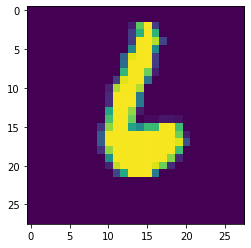

In [22]:
plt.imshow(batch_x[400].reshape(28,28))

In [23]:
batch_y[400]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [24]:
print(batch_y[400].argmax())

6


# MODEL

In [41]:
x = tf.placeholder(tf.float32,[None,784])    

y_true = tf.placeholder(tf.float32,[None,10]) 

In [42]:
# 10 set of 784 weights

w = tf.Variable(tf.zeros([784,10]))

In [43]:
# 10 biases - one for each neuron

b = tf.Variable(tf.zeros([10]))

In [44]:
# Net input value and activation function


I = tf.add(tf.matmul(x,w),b)   

#activation function

softmaxoutput = tf.nn.softmax(I)                 # sigmoid(I) Give output between 0 or 1

In [50]:

# define the cost/loss function and the optimizer

individual_loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y_true, logits = softmaxoutput)

loss = tf.reduce_mean(individual_loss)

gdo = tf.train.GradientDescentOptimizer(learning_rate = 0.5)

train = gdo.minimize(loss)

In [51]:
init = tf.global_variables_initializer()

In [52]:
sess = tf.Session()
sess.run(init)
#sess.run(train)  # 


In [53]:
sess.run(w)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [54]:
sess.run(b)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
# Training

for i in range(10000):
    batch_x, batch_y = mnist.train.next_batch(100)
    
    sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
    

In [57]:
# infernce  - predict
# execute the output node in a session

predict = sess.run(softmaxoutput, feed_dict = {x: mnist.test.images})

In [58]:
predict

array([[7.6636901e-09, 2.1011519e-16, 5.3784901e-09, ..., 9.9999726e-01,
        1.2761274e-09, 1.0733094e-07],
       [2.4130588e-06, 2.2874995e-11, 9.9994457e-01, ..., 6.1682244e-21,
        3.0725624e-07, 1.3538096e-16],
       [3.4882754e-09, 9.9877006e-01, 9.1457443e-04, ..., 2.3406628e-05,
        1.4147632e-04, 5.3752588e-06],
       ...,
       [4.9608771e-13, 4.7565662e-12, 1.6093474e-10, ..., 1.1446872e-06,
        9.7033917e-05, 1.0317300e-03],
       [7.6803162e-06, 9.7356160e-06, 6.2461697e-07, ..., 4.1078376e-08,
        7.8188622e-01, 1.0571302e-06],
       [3.8389820e-09, 7.9299060e-19, 1.1694011e-06, ..., 4.4468345e-18,
        1.3406245e-11, 1.6499658e-14]], dtype=float32)

In [59]:
# argmax will give the predicted value in terms of a number

result = sess.run(tf.argmax(predict, axis = 1))

In [61]:
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [62]:
result.shape

(10000,)

In [63]:
# same way get the label value using argmax

labhot = sess.run(tf.argmax(mnist.test.labels, axis = 1))

In [66]:
accuracy_score(result, labhot)

0.9256

In [65]:
# Run inference to test the model

In [67]:
test_image, test_label = mnist.validation.next_batch(1)

In [68]:
# run Inference

mymax = tf.argmax(softmaxoutput, 1)  # axis =1 do the maximum value column wise each row
print("Predicted value:")
print(sess.run(mymax, feed_dict = {x:test_image}))

Predicted value:
[3]


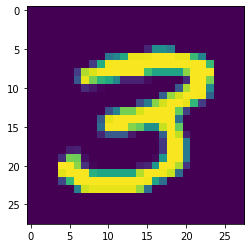

In [70]:
# display the image

plt.imshow(test_image.reshape(28,28))